In this script, some basic analysis of the data is done. Unlike usual datasets that have more rows than columns, in this data we have many columns for a small number of states (50), which makes the analysis different from many others. Fist of all, we need to explore the relationships between the columns and find the effective ones. Moreover, every factor can be analyzed separately which needs a lot of time. Therefore, as examples, in this script a number of initial guesses has been explored.

In [133]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [126]:
table_1 = pd.read_csv('table_1.csv')
table_1.rename(columns={'Unnamed: 0':'state'},inplace=True)
table_1.set_index('state',inplace=True)

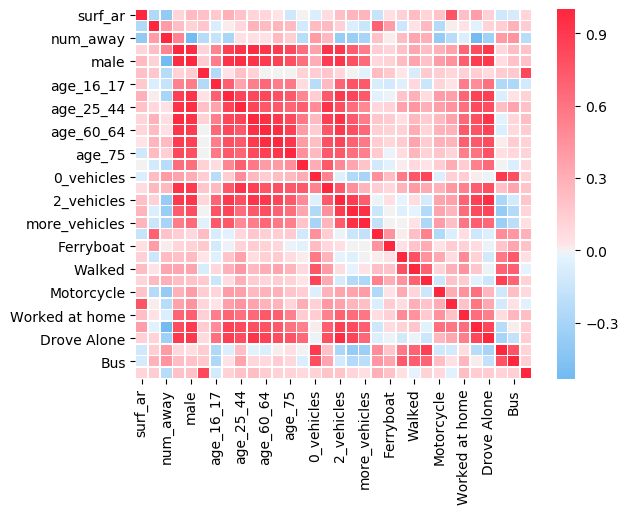

In [127]:
data = table_1
rdgn = sns.diverging_palette(h_neg=250, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(data.corr(), annot=False, cmap=rdgn, center=0.00,linewidths=.5)

we can see the high correlation of public transportation with 0-vehicle and 1-vehicle households, which is an obvious result. But the effect of age does not seem as meaningful. To evaluate this better, we can manipulate the columns and make them more general. For example, we could put all public transportation means in one column and divide ages to young, middle age and over 65.

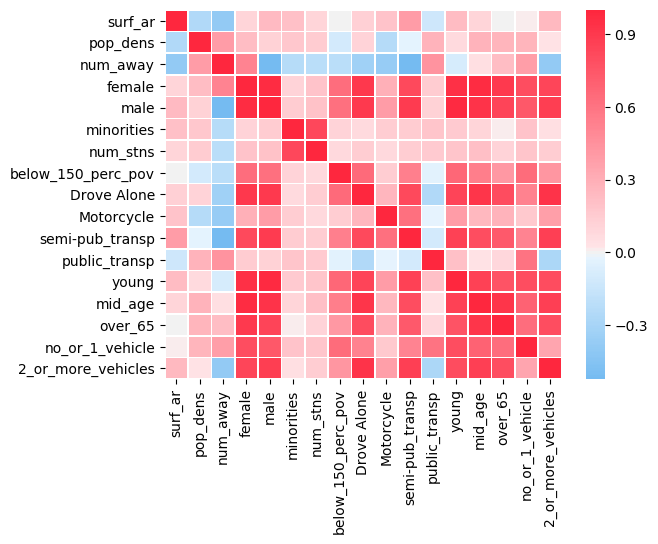

In [128]:
data = table_1[['surf_ar','pop_dens','num_away', 'female','male','minorities','num_stns','below_150_perc_pov','Drove Alone','Motorcycle']]
data['semi-pub_transp'] = table_1['Carpool']+table_1['Taxicab']
data['public_transp'] = table_1['Railroad']+table_1['Ferryboat']\
+table_1['Subway or Streetcar or Lightrail']+table_1['Bus']
data['young'] = table_1['age_16_17']+ table_1['age_18_24']+ table_1['age_25_44']
data['mid_age'] = table_1['age_45_59']+table_1['age_60_64']
data['over_65'] = table_1['age_65_74']+table_1['age_75']
data['no_or_1_vehicle'] = table_1['0_vehicles']+table_1['1_vehicles']
data['2_or_more_vehicles'] = table_1['2_vehicles']+table_1['3_vehicles']+table_1['more_vehicles']
rdgn = sns.diverging_palette(h_neg=250, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(data.corr(), annot=False, cmap=rdgn, center=0.00,linewidths=.5)

1. Analysis based on the number of vehicles in a household: <br>
It can be seen that having 2 or more vehicles in a household has a high positive correlation with driving alone to work and using semi-public transportaion (here, carpool and taxicab are categorized as semi-public transportation) and negative correlation with public transportation usage. On the other hand, having one or no vehicles in a household is highly and positively correlated with using public transportation.<br>
2. Analysis based on percentage of minorities:<br>
Percentage of minorities of workers has a very high positive correlation with the number of amtrak stations ('num_stns'). This could be due to the culture and pupulation combination of many northern and west-side states. <br>
3. Analysis based on the number of Amtrak stations:<br>
Unlike it might have been expected, number of Amtrak stations does not have a positive correlation with the percent of workers who work away from their state of residence. But this result could be further analyzed using the surface area of each state. In other words, a better metric could be number_of_stations/surface_area, so that we get how the stations are distributed rather than just the number.
4. Analysis based on surface area: <br>
Surface area of a state has negative correlation with number of away workers and with public transportation. This result could be expected.

In [129]:
data.to_csv('data.csv')

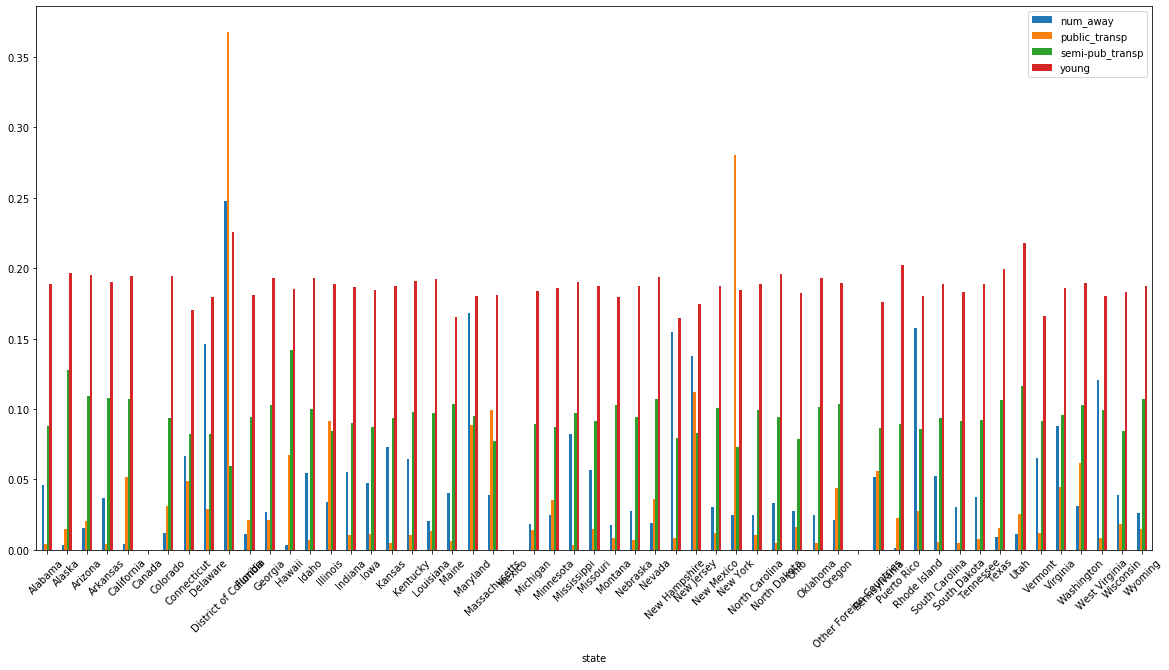

In [65]:
data_sh = data[['num_away','public_transp','semi-pub_transp']]
data_sh['young']=data['young']/3
ax = data_sh.plot.bar(rot=45,figsize=(20,10))

The upper bar-chart does not provide meanngful results, hence futher analysis is conducted later.

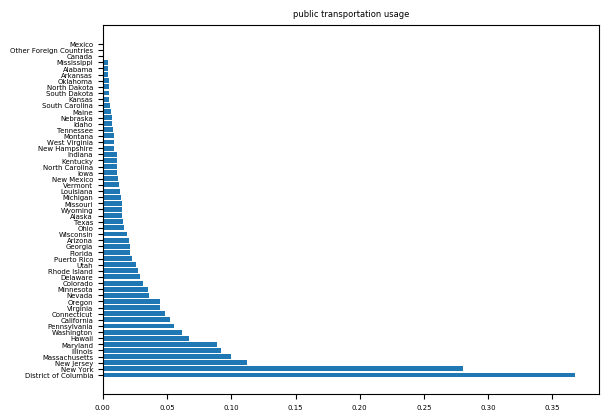

In [84]:
plt.rcdefaults()
plt.rcParams.update({'font.size': 5})
fig, ax = plt.subplots()

data_bar = data.reset_index()
data_bar.sort_values(by=['public_transp'],inplace=True)
ax.barh(data_bar['state'],data_bar['public_transp'], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('public transportation usage')

plt.show()

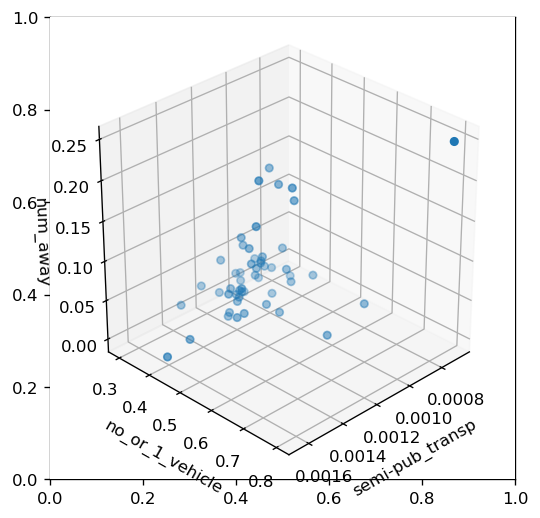

In [131]:
fig, ax = plt.subplots(figsize=(5,5),dpi=120)
plt.rcParams.update({'font.size': 10})
angle_z = 30
angle_x_y =45
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0.0116*data['semi-pub_transp'].values, \
                                 data['no_or_1_vehicle'].values, \
                                 data['num_away'].values)
ax.set_xlabel('semi-pub_transp')
ax.set_ylabel('no_or_1_vehicle')
ax.set_zlabel('num_away')
ax.view_init(angle_z,angle_x_y)
plt.show()

This plot shows a somewhat linear relationship between the number of away workers with semi-public transportation users. We can see that there are many features of this data that are worth analyzing, but in this short script, I have only analyzed a number of these features as examples.